In [1]:
#Churn Prediction

In [2]:
'''
Problem Statement: Financial institutions, such as banks and insurance companies, face the constant challenge of customer churn, where customers stop using their services.
Predicting customer churn allows these institutions to proactively engage at-risk customers with retention strategies.
The goal is to build a model that can predict whether a customer is likely to leave the financial institution within a specific time frame, based on historical data.
'''

'\nProblem Statement: Financial institutions, such as banks and insurance companies, face the constant challenge of customer churn, where customers stop using their services.\nPredicting customer churn allows these institutions to proactively engage at-risk customers with retention strategies.\nThe goal is to build a model that can predict whether a customer is likely to leave the financial institution within a specific time frame, based on historical data.\n'

In [4]:
#Import important libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [5]:
#Importing Data
df= pd.read_csv('Churn_Modelling.csv')

In [6]:
#Lets check whats inside
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**DATA** **PREPROCESSING**

In [7]:
##Lets dive deeper into the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#Lets check for missing values if any
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#Lets check for duplicate values
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [10]:
#We have two categorical columns i.e. geography and gender
#Lets convert the same to numerical columns using Label Encoder

In [11]:
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [12]:
##Remove RowNumber as its not an significant feature
df.drop(columns= ['RowNumber'], inplace= True)

In [13]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**Exploratory Data Analysis**

In [14]:
##Statistics Summary
df.describe()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='CreditScore', ylabel='Count'>

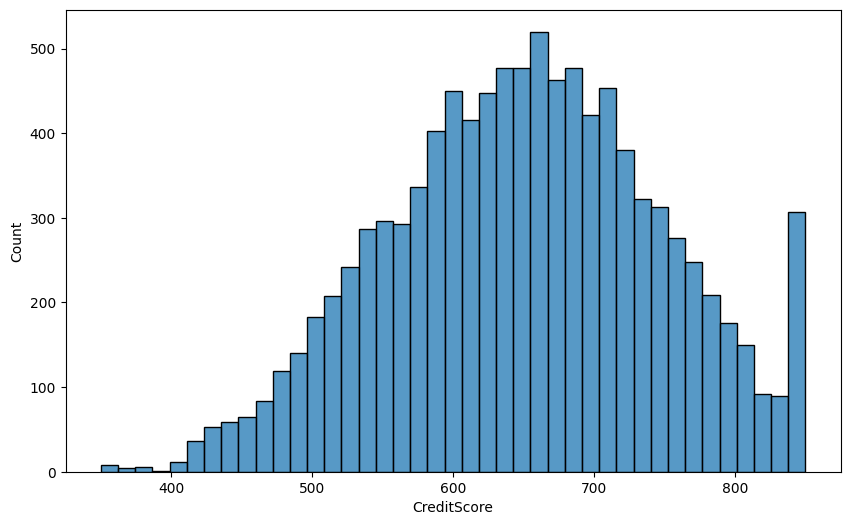

In [15]:
##Univariate Analysis for Numerical Features
plt.figure(figsize= (10,6))
sns.histplot(df['CreditScore'])

In [16]:
#Observations on above histplot: The plot is left tailed indicating left skewed distribution. Hence we can conclude that many people have less credit score.

<Axes: xlabel='Age', ylabel='Count'>

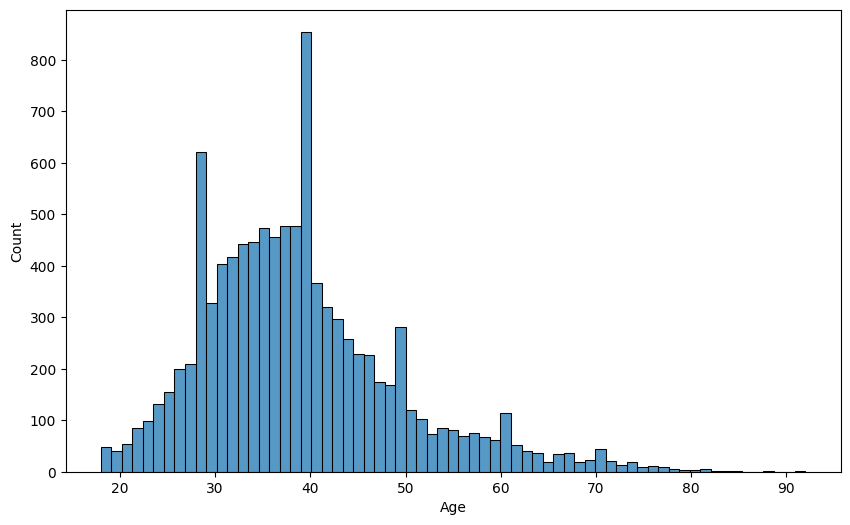

In [17]:
plt.figure(figsize= (10,6))
sns.histplot(df['Age'])

In [18]:
#We can see maximum people come under age group 30-50 years.

([<matplotlib.patches.Wedge at 0x1eeba7070e0>,
 [Text(-0.8786145768896576, -0.661843202939343, '1'),
  Text(0.8786140456420537, 0.6618439081841755, '0')],
 [Text(-0.4792443146670859, -0.36100538342145977, '70.6%'),
  Text(0.4792440248956656, 0.3610057681004593, '29.4%')])

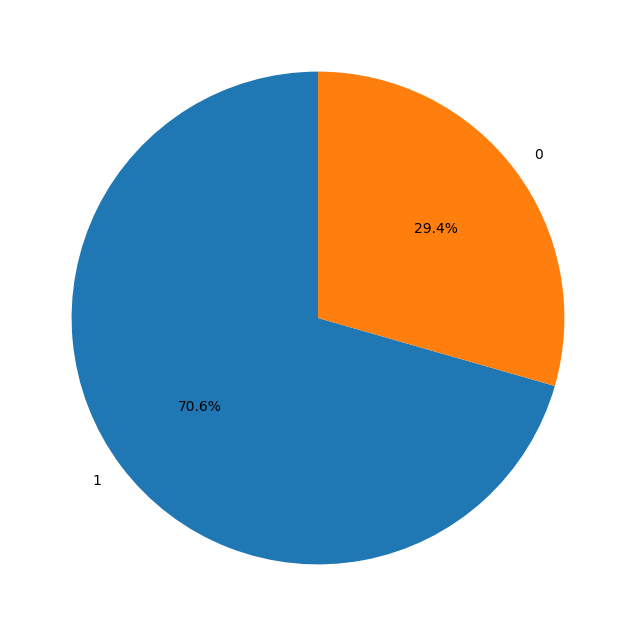

In [19]:
##Univariate Analysis for Catgorical Features
plt.figure(figsize=(8, 8))
plt.pie(df['HasCrCard'].value_counts(), labels=df['HasCrCard'].value_counts().index, autopct='%1.1f%%', startangle=90)

In [20]:
### We can see only 70.6% users have active credit cards. So one can conclude that 29.4% users have not fully utilized services.

([<matplotlib.patches.Wedge at 0x1eebe7c7650>,
 [Text(-1.0987625198674604, -0.05216248589272836, '1'),
  Text(1.0987625153072664, 0.052162581949602216, '0')],
 [Text(-0.5993250108367965, -0.028452265032397284, '51.5%'),
  Text(0.599325008349418, 0.02845231742705575, '48.5%')])

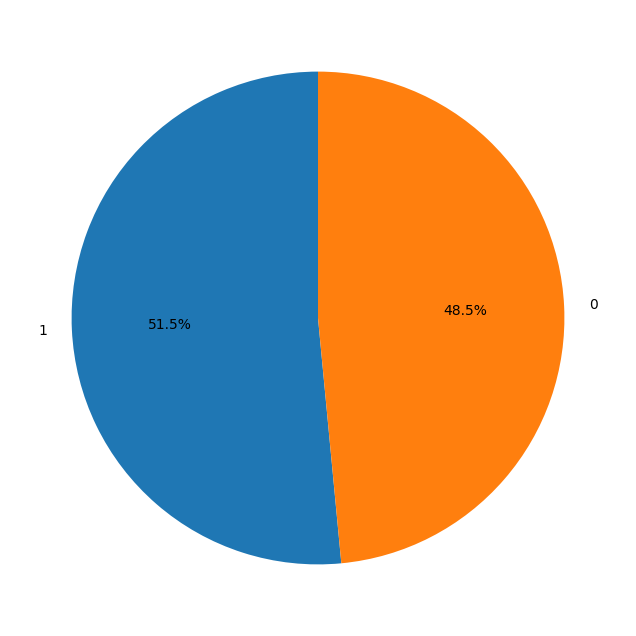

In [21]:
plt.figure(figsize=(8, 8))
plt.pie(df['IsActiveMember'].value_counts(), labels=df['IsActiveMember'].value_counts().index, autopct='%1.1f%%', startangle=90)

In [22]:
## We can see nearly 50% users aren't actively using services.

In [23]:
##Lets put independent features together
features= ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [24]:
X= df[features]
y= df['Exited']

In [25]:
##Splitting data for training and testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [26]:
###Feature Scaling
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [27]:
X_train[:5] #sample check

array([[ 0.35649971, -0.9055496 ,  0.91324755, -0.6557859 ,  0.34567966,
        -1.21847056,  0.80843615,  0.64920267,  0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755,  0.29493847, -0.3483691 ,
         0.69683765,  0.80843615,  0.64920267,  0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, -1.41636539, -0.69539349,
         0.61862909, -0.91668767,  0.64920267, -1.02583358, -0.25280688],
       [-0.94071667, -0.9055496 , -1.09499335, -1.13114808,  1.38675281,
         0.95321202, -0.91668767,  0.64920267, -1.02583358,  0.91539272],
       [-1.39733684, -0.9055496 ,  0.91324755,  1.62595257,  1.38675281,
         1.05744869, -0.91668767, -1.54035103, -1.02583358, -1.05960019]])

In [28]:
###Lets apply Random Forest Classifier
model= RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
#Lets predict for testing
y_pred= model.predict(X_test)

In [30]:
########Lets check the accuracy of our model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.867
Precision: 0.7702127659574468
Recall: 0.46055979643765904
F1 Score: 0.5764331210191083
AUC-ROC: 0.7134784047527437
Confusion Matrix:
 [[1553   54]
 [ 212  181]]


In [31]:
##Model Evaluation: Cross Validation
from sklearn.model_selection import cross_val_score
cv_scores= cross_val_score(model, X, y, cv=5, scoring= 'accuracy')
print(cv_scores)

[0.859  0.875  0.8575 0.863  0.856 ]


In [32]:
##Hyper Parameter Tuning:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


In [33]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


d:\Streamlit\Churn-Prediction-Model\venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
96 fits failed out of a total of 192.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Streamlit\Churn-Prediction-Model\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Streamlit\Churn-Prediction-Model\venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\Streamlit\Churn-Prediction-Model\venv\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [39]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=10, n_estimators=200)


In [40]:
best_model= grid_search.best_estimator_
y_pred_best= best_model.predict(X_test)

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.867


In [43]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [49]:
import streamlit as st 

Exited = {0: 'No Churn', 1: 'Churn'}

st.sidebar.title("Input Features")
CreditScore= st.sidebar.slider("CreditScore", float(df["CreditScore"].min()), float(df["CreditScore"].max()))
Geography= st.sidebar.slider("Geography", float(df["Geography"].min()), float(df["Geography"].max()))
Gender= st.sidebar.slider("Gender", float(df["Gender"].min()), float(df["Gender"].max()))
Age= st.sidebar.slider("Age", float(df["Age"].min()), float(df["Age"].max()))
Tenure= st.sidebar.slider("Tenure", float(df["Tenure"].min()), float(df["Tenure"].max()))
Balance= st.sidebar.slider("Balance", float(df["Balance"].min()), float(df["Balance"].max()))
NumOfProducts= st.sidebar.slider("NumOfProducts", float(df["NumOfProducts"].min()), float(df["NumOfProducts"].max()))
HasCrCard= st.sidebar.slider("HasCrCard", float(df["HasCrCard"].min()), float(df["HasCrCard"].max()))
IsActiveMember= st.sidebar.slider("IsActiveMember", float(df["IsActiveMember"].min()), float(df["IsActiveMember"].max()))
EstimatedSalary= st.sidebar.slider("EstimatedSalary", float(df["EstimatedSalary"].min()), float(df["EstimatedSalary"].max()))


input_data= [[CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]]

prediction= best_model.predict(input_data)
status= Exited[prediction[0]]

st.write(prediction)
st.write(f"The churn prediction is {status}")

2024-09-19 17:03:52.992 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-19 17:03:52.994 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-19 17:03:52.995 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-19 17:03:52.996 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-19 17:03:52.997 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-19 17:03:52.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-19 17:03:52.999 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-19 17:03:53.000 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar